# Algorithms 🧠, profiling 🕵️‍♂️, and optimisation 🚀

### (How to speed up my code?)

### [~~Dr~~ **Marijan** ~~Beg~~](https://profiles.imperial.ac.uk/m.beg) (MAH - ree - yahn)

- (Computational) Physicist: I am attempting to understand the world by delegating the hard work to computers. 🤔😵‍💫 
  - BSc/MSc in Nanophysics / Nanoelectronics / Nanotechnology 🔬
  - PhD in Computational Physics (nanomagnetism) 🖥️🧲
  - nano = very small (my brain thinks in nanometres and picoseconds...)

- **Teaching**:
  - You already "saw" me a bit in the **Introduction to Python** pre-sessional course.
  - You will see me several times in MPM/NPP, ACDS (group projects), BDA. 🫣
  - You will hear from me a lot about your **IRP** (summer project). 🤯
    - First IRP Townhall meeting in several weeks.

- **Research**:
    - I write simulation and data analysis code (Research Software Engineering) for industry and academia.
    - I then use it to explore different nanoscale magnetic phenomena and magnetic materials:
      - Fundamental physics, e.g. stability and dynamics of topological quasi-particles (skyrmions, hopfions) and field singularities (Bloch Points).
      - Applications: I hope to discover a way to rebuild today's electronics from scratch by employing electron's spin (not only its charge) to store and process 0s and 1s.
   - If you are interested in any of the topics for your IRP, let me know.

### How to find me?

- **Office**: Royal School of Mines (RSM) 4.95 (4th floor)
- **Email**: m.beg@imperial.ac.uk
- **GitHub**: [@marijanbeg](https://github.com/marijanbeg)
- **Marijan's anonymous feedback form**: https://forms.office.com/e/BiekMgPTMm
  - the form is the same all year, and it is available anytime... I'm keeping an eye on it.

- I’m also a **Mental Health First Aider**
  - If you feel overwhelmed and just need someone to talk to, I'm here to listen, support, and guide you towards helpful resources.

### Don't Hesitate to Interrupt!

- [**Cognitive Load Theory (CLT)**](https://www.tandfonline.com/doi/full/10.3109/0142159X.2014.889290)
  - On average, our brains can hold **only 7 "chunks" of information at once** in working memory.
  - A chunk can be a fact, idea, or task.
  - Being "smart" does not mean more chunks.
  - Once we reach this limit, we overlook or forget things.
- If I juggle 7 tasks at once, I will forget the 8th one...
- **If I say some nonsense, you spot a mistake, or have a question, just speak up: "Hey Marijan, what...?"**

### Intended Learning Outcomes (ILOs)

By the end of this lecture you should be able to:

1. Identify bits of your code that are (too) slow by **profiling** 🕵️‍♂️.
2. Find the *big-O* of a particular **algorithm** 🧠 and understand its impact on the performance.
3. Use several **optimisation** 🚀 techniques to speed up your code.

### Intended Learning Outcomes (ILOs)???

- An ILO is what you should be able to do by the end of a lecture or a module.
- Think about ILOs as your **learning goals**.
- At MSc level, we often throw at you much more information than you have time to digest.
- ILOs help both you and me to stay focused on what's most important.
- If at the end of the lecture, you feel like you can do most ILOs, we did a good job! 🎉🕺

## Profiling: Identifying bottlenecks 🕵️‍♂️

Let's have a look at a bit of "slow" code:

In [1]:
n = 1_000_000_000
s = sum(range(1, n+1))

assert s == n * (n+1) / 2

We can "see/feel" it runs for some time, but for how long?

### Stopwatch approach ⏱️

In [1]:
import time

start_time = time.time()  # start the stopwatch

n = 100_000_000
s = sum(range(1, n+1))

end_time = time.time()  # stop the stopwatch

wall_time = end_time - start_time
print(f"Wall Time: {wall_time:.3f} seconds")

Wall Time: 2.580 seconds


Why do we call it **wall time**? 🤔

### Wall time 🕑 vs. CPU time 🖥️

#### Wall Time

- The actual time taken from the start to the end of a process as measured by a clock on the wall.
- It includes all time spent, including time waiting for I/O operations, time spent in other processes, and any other delays.

#### CPU Time
- CPU time is the time for which a CPU was actively processing instructions.
- It does not include time spent waiting for I/O operations or time when the CPU is idle.

### Example

In [1]:
import time
import requests

start_wall_time = time.time()
start_cpu_time = time.process_time()

# Simulate a delay by reading something from the internet
response = requests.get('https://www.example.com')
data = response.text

end_wall_time = time.time()
end_cpu_time = time.process_time()

wall_time = end_wall_time - start_wall_time
cpu_time = end_cpu_time - start_cpu_time

print(f"Wall Time: {wall_time:.2f} seconds")
print(f"CPU Time: {cpu_time:.2f} seconds")

Wall Time: 0.37 seconds
CPU Time: 0.02 seconds


### Wall time 🕑 vs. CPU time 🖥️

$$\text{CPU time}$$

$$+$$

$$\text{time spent on thing outside our code (reading/writing to disk, internet,...)}$$

$$\downarrow$$

$$\text{wall time}$$

We like to keep things simple - we will measure only **wall time**. In computational science, the code is "computation heavy" - we assume that most of the time is spent inside the CPU.

### [`timeit`](https://docs.python.org/3/library/timeit.html) module

- A simple and quick way to time small bits of code.
- It measures **wall time**.
- Part of the Python standard library (available wherever Python is installed)
- We will use it as an IPython magic command
  - **IPython** is the kernel that powers Python code execution in Jupyter notebooks (Jupyter used to be called *IPython Notebook*)
  - IPython magic commands are special commands:
    - prefixed with % (line magic) or %% (cell magic)
    - work only when we are working in notebooks

### `%timeit` magic

In [4]:
%timeit 1 + 2

19 ns ± 1.12 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


- The command `1 + 2` was executed in `r` runs, each consisting of `n` loops (`r * n` in total) to get better statistics:
  - **Runs**: The number of times the entire timing experiment is repeated to help average out any variability in the execution time due to external factors.
  - **Loops**: The number of times the code snippet is executed in each run. This helps to get a more accurate measurement by reducing the impact of very short execution times.
- We should pay attention to standard deviation - if it's too large, we might want to repeat the measurement.
- We can specify the number of runs (`-r`) and the number of iterations (`-n`).

In [25]:
%timeit -r 10 -n 100 1 + 2

64.5 ns ± 12.9 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


### `%%timeit` magic

Fair enough, but what if I have multiple lines of code? 💁‍♂️

In [26]:
%%timeit  # will do that ;)

n = 1_000_000
total = 0
for i in range(n):
    total += i

80.6 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### `%timeit` output object

Instead of a simple print of wall time, we can ask for the output object (`-o`).

In [27]:
%timeit -o sum(i for i in range(1_000_000))

94.9 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 94.9 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

The first line in the output comes from `print`, and the second one comes from `return`. Whatever `return` throws, we can catch it with a variable.

In [28]:
timeit_object = %timeit -o sum(i for i in range(1_000_000))

88.5 ms ± 4.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Times of individual runs

In [29]:
timeit_object.timings

[0.09725858997553587,
 0.08477135999128223,
 0.08775740005075931,
 0.08874326003715396,
 0.08507532002404332,
 0.09013069001957774,
 0.08541401000693441]

#### A bit more statistics

In [30]:
timeit_object.average  # average wall time

0.08845009001504098

In [31]:
timeit_object.best  # the best (fastest) time

0.08477135999128223

In [32]:
timeit_object.worst  # the worst (slowest) time

0.09725858997553587

In [33]:
timeit_object.stdev  # standard deviation

0.004055327446233737

### Exercise 1: Loop or recursion?

Write a function to calculate the factorial of a given number `n`.
1. Implement `factorial_loop(n)` using a `for` loop.
2. Implement `factorial_recursion(n)` using recursion.
3. Use `%timeit` to compare the performance of both implementations and determine which one is faster and how much.

#### What is Factorial?
The factorial of a non-negative integer `n` is the product of all positive integers less than or equal to `n`. It is denoted by `n!` and defined as:
$$n! = n \times (n-1) \times (n-2) \times \ldots \times 1 $$

For example, $5! = 5 \times 4 \times 3 \times 2 \times 1 = 120$.

#### What is Recursion?
Recursion is a programming technique where a function calls itself (😯🤯) to solve smaller instances of the same problem. For example,

In [35]:
#My solution:

def factorial_loop(n):
    fac = n
    for i in range(1, n):
        fac = fac * i
    return fac

def factorial_recursion(n):
    if n == 1 or n == 0:
        return 1
    else:
        return n * factorial_recursion(n-1)

%timeit factorial_loop(10)
%timeit factorial_recursion(10) # this is longer by an order of magnitude



692 ns ± 27.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.29 μs ± 52.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [36]:
def countdown(n):
    """
    Print a countdown from n to 0 using recursion.
    
    Parameters
    ----------
    n : int

        The starting number for the countdown.
    
    """
    if n <= 0:
        print("Happy New Year!!!")
    else:
        print(n)
        countdown(n-1)  # here, the function calls itself 🤯

countdown(3)

3
2
1
Happy New Year!!!


#### Solution

In [39]:
def factorial_loop(n):
    """
    Calculate the factorial of a number using a for loop.
    
    Parameters
    ----------
    n : int
        The number to calculate the factorial of.
    
    Returns
    -------
    int
        The factorial of the input number.

    """
    product = 1
    for i in range(1, n+1):  # we start from 1 to n+1 because range is exclusive
        product = product * i

    return product


def factorial_recursion(n):
    """
    Calculate the factorial of a number using recursion.
    
    Parameters
    ----------
    n : int
        The number to calculate the factorial of.
    
    Returns
    -------
    int
        The factorial of the input number.

    """
    if n == 0:
        return 1
    else:
        return n * factorial_recursion(n-1)


In [40]:
timeit_loop = %timeit -o factorial_loop(100)

9.47 μs ± 152 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [41]:
timeit_recursion = %timeit -o factorial_recursion(100)

15 μs ± 211 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [42]:
ratio = timeit_recursion.average / timeit_loop.average
print(f'Recursion version is {ratio:.2f} times slower.')

Recursion version is 1.58 times slower.


Recursion solution is slower due to the overhead of function calls. Each recursive call adds a new frame to the call stack, consuming memory and increasing the wall time. Recursion should be avoided in Python for problems that can be solved iteratively, especially when dealing with large input sizes or when performance is critical. In addition, the size of the stack is limited -- we cannot have more than $N$ active function calls. If we do, that results in stack overflow, after which the famous coding forum, [Stack Overflow](https://stackoverflow.com/) is named.

**What is a stack?** A stack is a data structure that keeps track of active functions, where each call (`factorial(n)`) adds a new frame to the stack and each `return` removes the top frame, ensuring that the most recently called function is the first to be completed.

### `cProfile` - getting more detail 🔍

- Using `timeit` magic, we measured the total wall time of a code snippet.
- The code snippet may be calling lots of other functions internally.
- How do we then find a bottleneck? 🤔 Where do we spend most time?
- `cProfile` provides detailed statistics on how many times each function was called and how much time was spent in each function, allowing us to identify performance bottlenecks at a more granular level.

### Example: Estimating $\pi$ using the Monte Carlo method

The Monte Carlo method involves generating random points in a unit square and determining how many fall within a quarter circle inscribed within the square. The ratio of the points inside the quarter circle $n_\text{in}$ to the total number of points $n_\text{total}$ can be used to estimate $\pi$:

$$\pi = 4\frac{n_\text{in}}{n_\text{total}}$$

<div>
<center>
    <img src="images/pi-monte-carlo.png" width="400" alt="pi estimation" />
</center>
</div>

Marcus Surges. [Java: How to approximate Pi with the Monte Carlo simulation](https://blog.surges.eu/java-how-to-approximate-pi-with-the-monte-carlo-simulation/). (2020)

In [7]:
import random


def random_list(size):
    """
    Generate a list of random numbers between 0 and 1.
    
    Parameters
    ----------
    size : int
        The number of random numbers to generate.
    
    Returns
    -------
    list of float
        A list of random numbers between 0 and 1.
    """
    return [random.random() for _ in range(size)]

In [8]:
def distance(x, y):
    """
    Compute the distance of a point (x, y) from the origin (0, 0).
    
    Parameters
    ----------
    x : float
        The x-coordinate of the point.
    y : float
        The y-coordinate of the point.
    
    Returns
    -------
    float
        The distance from the origin.
    """
    return (x**2 + y**2)**0.5

In [9]:
def estimate_pi(n):
    """Estimate the value of pi using Monte Carlo simulation.
    
    Parameters
    ----------
    n : int
        The number of random points generated.
        
    Returns
    -------
    float
        An estimate of pi.

    """
    x_list = random_list(n)
    y_list = random_list(n)
    
    in_circle = 0
    for x, y in zip(x_list, y_list):
        if distance(x, y) <= 1:
            in_circle += 1
            
    return 4*in_circle / n

print(f'Estimate of pi: {estimate_pi(1_000_000)}')

Estimate of pi: 3.143004


### Total wall time

In [6]:
%timeit estimate_pi(n=1_000_000)

1.09 s ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Well... We have the total wall time, but can we have a look at what happens internally? At the end of the day, we need to find that bottleneck.

### `%prun` magic

Just like [`timeit`](https://docs.python.org/3/library/timeit.html) module had its IPython magic command (`%timeit`), [`cProfile`](https://docs.python.org/3/library/profile.html) has its own: `%prun` 🪄🧙

In [13]:
%prun estimate_pi(n=1_000_000)

         3000151 function calls (3000150 primitive calls) in 2.147 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1000000    0.754    0.000    0.754    0.000 1874650273.py:1(distance)
        2    0.517    0.259    0.851    0.426 4180216494.py:4(random_list)
        1    0.441    0.441    2.046    2.046 2152092804.py:1(estimate_pi)
  2000000    0.360    0.000    0.360    0.000 {method 'random' of '_random.Random' objects}
        1    0.027    0.027    2.073    2.073 <string>:1(<module>)
      2/1    0.019    0.009    2.139    2.139 {built-in method builtins.exec}
        1    0.019    0.019    0.031    0.031 {method 'execute' of 'sqlite3.Connection' objects}
        2    0.010    0.005    0.016    0.008 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    0.000    0.000 inspect.py:3129(_bind)
    

### What are all those columns?

- `filename:lineno(function)` (last column): Somewhat cryptic way of saying what function is the row for. What we are looking for is often in parenthesis at the end.
- `ncalls`: Number of times the function was called.
- `tottime`: Total time spent in the function (**excluding** time in sub-functions).
- `percall`: Time per call (`tottime` divided by `ncalls`).
- `cumtime`: Cumulative time spent in the function **and** all sub-functions.
- `percall`: Time per call (`cumtime` divided by `ncalls`).

### Exercise 2: Understanding the `%prun` table

In this exercise, you will analyze the performance of a function that calls two other functions internally. Each of these functions includes a `time.sleep()` call to simulate time-consuming operations and performs a "useful" (not really) task. You do not need to write any code in this exercise. Just run the cells.

What should I do then? Look at the `%prun` output table and attempt to match it with the code to understand the values of individual columns.

In [2]:
import time

def lazy_sum(n):
    """
    Lazily sleep for 0.5 seconds and then calculate the sum of the first n natural numbers.
    
    Parameters
    ----------
    n : int
        The number up to which to lazily calculate the sum.
    
    Returns
    -------
    int
        The lazy sum of the first n natural numbers.
    """
    time.sleep(0.5)  # sleep for 0.5 seconds and do nothing 😴
    return sum(range(1, n+1))

def lazy_factorial(n):
    """
    Lazily sleep for 1 second and then calculate the factorial of n.
    
    Parameters
    ----------
    n : int
        The number for which to lazily calculate the factorial.
    
    Returns
    -------
    int
        The lazy factorial of n.
    """
    time.sleep(1) # sleep for 1 second and do nothing 😴

    # As we have seen earlier, recursion is not the fastest way to calculate factorial.
    # So, we will use a for loop.
    product = 1
    for i in range(1, n+1):
        product *= i
    return product

def lazy_main_function():
    """
    Lazily call lazy_sum and lazy_factorial multiple times.
    """
    results = []
    for i in range(1, 4):  # 3 iterations in total i = 1, 2, 3
        results.append(lazy_sum(i))
        results.append(lazy_factorial(i))
    return results

We can now run `%prun` magic on `lazy_main_function`:

In [3]:
%prun lazy_main_function()

         300 function calls (295 primitive calls) in 4.513 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        6    4.338    0.723    4.338    0.723 {built-in method time.sleep}
        3    0.166    0.055    0.166    0.055 {built-in method _overlapped.GetQueuedCompletionStatus}
        3    0.004    0.001    3.171    1.057 base_events.py:1909(_run_once)
        2    0.003    0.001    0.003    0.001 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.001    0.001    0.001    0.001 {method 'disable' of '_lsprof.Profiler' objects}
        1    0.000    0.000    1.339    1.339 955906286.py:43(lazy_main_function)
        3    0.000    0.000    3.165    1.055 windows_events.py:443(select)
        3    0.000    0.000    1.333    0.444 955906286.py:3(lazy_sum)
        1    0.000    0.000    0.000    0.000 iostream.py:126(_event_pipe_gc)
        3    0.000    0.000    0.166    0.055 windows_events.py:761(_poll)
 

### `line_profiler` - even more details 🔬

- `cProfile` (`%prun`) told us how many times we called each function and how much time we spent in it.
- Let's say we found a function that costs us most time. However, that function has 1000s of lines. 😱
- What lines are most computationally-expensive?
- For that, we use `line_profiler`
    - It is not part of the standard library: install it using `pip install line_profiler`
    - activate the extension with `%load_ext line_profiler`

In [22]:
%load_ext line_profiler

### Example: Line-profiling of Monte Carlo `estimate_pi` simulation

We will line-profile by running `%lprun -f estimate_pi estimate_pi(10000)`:
- `%lprun` - `line_profiler`'s magic ✨
- `-f estimate_pi` - we say that we want to inspect the lines inside `function`
- `estimate_pi(10000)` - The function call as the argument. This is the code that will be executed to profile.

In [10]:
%lprun -f estimate_pi estimate_pi(10000)

Timer unit: 1e-07 s

Total time: 0.0931367 s
File: C:\Users\User\AppData\Local\Temp\ipykernel_16216\2152092804.py
Function: estimate_pi at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def estimate_pi(n):
     2                                               """Estimate the value of pi using Monte Carlo simulation.
     3                                               
     4                                               Parameters
     5                                               ----------
     6                                               n : int
     7                                                   The number of random points generated.
     8                                                   
     9                                               Returns
    10                                               -------
    11                                               float
    12                          

### What are all those columns `%lprun` gave me?

- **Line Number**: The line number in the function.
- **Hits**: Number of times the line was executed.
- **Time**: Total time spent executing the line (in microseconds).
- **Per Hit**: Average time per execution of the line.
- **Time**: Percentage of the total time spent on that line.

### Profiling summary

- Slowly increase the level of granularity: `%timeit` $\rightarrow$ `%prun` $\rightarrow$ `%lprun`
- Profiling is a crucial step in performance optimization.
- It helps identify where to focus your efforts for maximum impact: We do not want to optimise everything!
- Be mindful of the overhead and use profiling to guide targeted optimizations.

## Algorithms 🧠

### What is an algorithm?

- Algorithm is a step-by-step procedure to solve a particular problem (a fancy word for **recipe** 👩‍🍳)
- Algorithm is an explicit, precise, finite, and deterministic problem-solving method that can be implemented as a computer program.
- Very often, algorithm is independent from the programming language.

### Characteristics of an algorithm

- **Precise and unambigous**: Clear in all aspects. Every step must mean only one thing.
- **Well-defined inputs**: Expected inputs (zero or more) must be clearly explained.
- **Well-defined outputs**: The output (one or more) of the algorithm must be well defined.
- **Finite**: The algorithm must terminate after a finite time.
- **Feasible**: Implementation must be possible with the available resources.
- **Language independent**: Ideally, it should not contain language-specific features.
- **(Deterministic)**: It gives the same output for same inputs.

### Analysis of Algorithms

- For an algorithm to be **feasible**, its implementation must be possible with the available resources (laptop, HPC cluster, Raspberry Pi, etc.).
- Analysing the algorithm usually means answering the following two questions:
    1. How long will it take for my code to run? (**time complexity**)
    2. Will my code run out of memory? (**space complexity**)

### Time complexity

- Computations are almost always **iterative** - we perform the same operation on all elements of a sequence, NumPy array, Pandas DataFrame, etc.
- The total running time depends on:
    - the time it takes for each iteration to execute (**profiling** we talked about earlier)
    - the number of iterations (**big O** we will talk about now)

### Big O

**Big O** notation, represented as $O(f(n))$, describes an upper bound on the time or space complexity of an algorithm.

- $n$: the size of the input, e.g., the number of elements in the NumPy array or the number of rows in Pandas DataFrame.
- $f(n)$: a function describing how the execution time grows as the input size $n$ increases.
- The notation $O(f(n))$ captures the asymptotic behaviour of the function, meaning we care about what happens as $n \rightarrow \infty$.

### A bit more about BigO...

1. **Upper Bound**: Big O gives an upper bound on the growth rate of an algorithm. For example, if an algorithm has a time complexity of $O(n^2)$, it means that, in the worst-case scenario, the running time grows no faster than $n^2$ as $n$ increases. This does not mean the running time will always be exactly $n^2$, just that it won’t grow faster than $n^2$.

2. **Asymptotic Analysis**: Big O notation focuses on the behavior of the function as $n \to \infty$. It ignores constant factors and lower-order terms because they have minimal impact on the growth rate for large $n$. For example, $O(3n^2 + 5n + 7)$ simplifies to $O(n^2)$ because $n^2$ dominates the function as $n$ grows larger.

3. **Dominant Term**: In Big O notation, only the most significant term (the one that grows the fastest as $n \to \infty$) is considered, and any coefficients are dropped ($O(3n^2 + 5n + 7)$ simplifies to $O(n^2)$). This simplifies comparisons between algorithms by focusing only on the term that has the largest impact on performance as the input size grows.


### Some common Big Os

- **$O(1)$** — *Constant Time*: The algorithm's runtime doesn’t change with the input size. Example: accessing an element in an array: `seq[i]`
- **$O(n)$** — *Linear Time*: The runtime grows linearly with the input size. Example: iterating through an array.
- **$O(n^2)$** — *Quadratic Time*: The runtime grows with the square of the input size. Example: nested for loops.
- **$O(\log n)$** — *Logarithmic Time*: The runtime grows logarithmically with the input size. Example: binary search.
- **$O(n \log n)$** — *Linearithmic Time*: The runtime grows in proportion to $n \times \log n$. Example: efficient sorting algorithms like merge sort.
- **$O(2^n)$** — *Exponential Time*: The runtime doubles with each additional input element. Example: recursive algorithms for the Fibonacci sequence without memoisation (we will look at that example later).

### How do Big Os compare?

<div>
<center>
    <img src="images/big-o.png" width="600" alt="big-O" />
</center>
</div>

[R. Shrestha. [The Big-Oh (O)— A beginners guide](https://articles.wesionary.team/the-big-oh-o-a-beginners-guide-a4c48af39bfa) (2023)]

### Examples of different Big Os 🤓

Please play with the examples only after you complete everything else in this lecture.

#### $O(\log N)$: binary search

Binary search is an efficient algorithm for finding an element in a sorted sequence. It works by repeatedly dividing the search interval in half:

1. Compare the target element `x` with the middle element of the sequence.
2. If the middle element is equal to `x`, the search is successful, and the index of the middle element is returned.
3. If `x` is greater than the middle element, the search continues in the right half of the sequence.
4. If `x` is less than the middle element, the search continues in the left half of the sequence.
5. This process is repeated on the new half until the target element is found or the search interval is empty.

In [28]:
def binary_search(arr, target):
    """
    Perform binary search on a sorted array to find the target value and count comparisons.
    
    Parameters
    ----------
    arr : list of int
        The sorted array to search.
    target : int
        The value to search for.
    
    Returns
    -------
    tuple
        A tuple containing the index of the target value if found (otherwise -1) and the number of comparisons made.
    """
    left, right = 0, len(arr) - 1
    comparisons = 0
    while left <= right:
        comparisons += 1
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid, comparisons
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1, comparisons

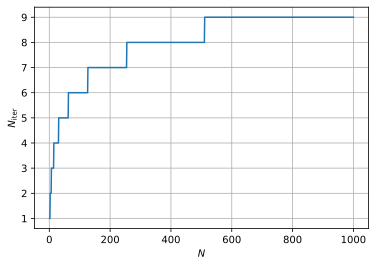

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

n_values = np.arange(1, 1001)
iterations = [binary_search(list(range(n)), -1)[1] for n in n_values]

plt.figure(figsize=(6, 4))
plt.plot(n_values, iterations)
plt.xlabel(r'$N$')
plt.ylabel(r'$N_\mathrm{iter}$')
plt.grid(True)
plt.show()

#### $O(N)$: Search for a maximum

Maximum search is a straightforward algorithm for finding the largest element in a sequence.

1. Start by assuming the first element in the sequence is the maximum.
2. Iterate through each element in the sequence.
3. For each element, compare it with the current assumed maximum.
4. If the current element is greater than the assumed maximum, update the assumed maximum to this new element.
5. Continue this process until all elements in the sequence have been compared.
6. By the end of the iteration, the assumed maximum will be the largest element in the sequence.

In [30]:
def find_maximum(seq):
    """
    Find the maximum value in a sequence and count the number of iterations.
    
    Parameters
    ----------
    seq : list of int
        The sequence to search.
    
    Returns
    -------
    tuple
        A tuple containing the maximum value in the sequence and the number of iterations.
    """
    current_max = seq[0]
    iterations = 0
    for i in seq:
        iterations += 1
        if i > current_max:
            current_max = i
    return current_max, iterations

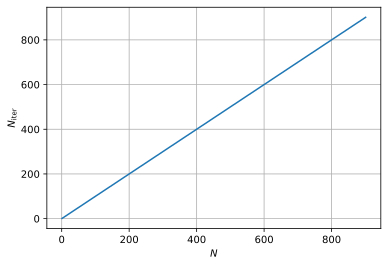

In [31]:
n_values = np.arange(1, 1001, 100)
iterations = []

for n in n_values:
    seq = list(range(n))
    _, iter_count = find_maximum(seq)
    iterations.append(iter_count)

plt.figure(figsize=(6, 4))
plt.plot(n_values, iterations)
plt.xlabel(r'$N$')
plt.ylabel(r'$N_\mathrm{iter}$')
plt.grid(True)
plt.show()

#### $O(N^{2})$: Look for all pairs (nested for loops)

The `find_pairs_with_sum` function finds all pairs of elements in a 1D sequence that sum up to a specific target value.

1. Initialize an empty list to store the pairs and a counter for the number of iterations.
2. Iterate through each element in the sequence using an outer loop.
3. For each element in the outer loop, iterate through the subsequent elements using an inner loop.
4. For each pair of elements, check if their sum equals the target value.
5. If the sum equals the target value, add the pair to the list of pairs.
6. Increment the iteration counter for each pair checked.
7. Continue this process until all pairs have been checked.
8. Return the list of pairs and the number of iterations.

In [32]:
def find_pairs_with_sum(seq, target):
    """
    Find all pairs of elements in the sequence that sum up to the target value and count the number of iterations.
    
    Parameters
    ----------
    seq : list of int
        The sequence to search.
    target : int
        The target sum value.
    
    Returns
    -------
    tuple
        A tuple containing the list of pairs and the number of iterations.
    """
    pairs = []
    iterations = 0
    for i in range(len(seq)):
        for j in range(i + 1, len(seq)):
            iterations += 1
            if seq[i] + seq[j] == target:
                pairs.append((seq[i], seq[j]))
    return pairs, iterations

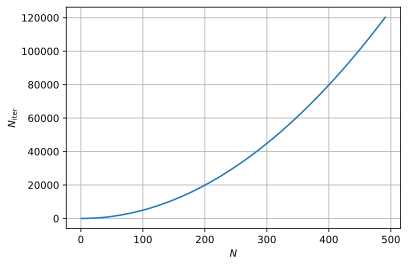

In [33]:
n_values = np.arange(1, 501, 10)
iterations = []

for n in n_values:
    seq = list(range(n))
    _, iter_count = find_pairs_with_sum(seq, n)  # Use n as the target to ensure some pairs exist
    iterations.append(iter_count)

plt.figure(figsize=(6, 4))
plt.plot(n_values, iterations)
plt.xlabel(r'$N$')
plt.ylabel(r'$N_\mathrm{iter}$')
plt.grid(True)
plt.show()

#### $O(N\log N)$: merge sort

Merge sort is a divide-and-conquer algorithm used to sort a sequence of elements.

1. **Divide**: Recursively divide the sequence into two halves until each sub-sequence contains a single element.
2. **Conquer**: Sort each sub-sequence. Since each sub-sequence contains only one element, they are already sorted.
3. **Merge**: Merge the sorted sub-sequences to produce new sorted sequences until a single sorted sequence is obtained.

In [42]:
def merge_sort(arr):
    """
    Sort an array using the merge sort algorithm and count the number of operations.
    
    Parameters
    ----------
    arr : list of int
        The array to sort.
    
    Returns
    -------
    tuple
        A tuple containing the sorted array and the number of operations.
    """
    if len(arr) <= 1:
        return arr, 0

    mid = len(arr) // 2
    left, left_ops = merge_sort(arr[:mid])
    right, right_ops = merge_sort(arr[mid:])
    merged, merge_ops = merge(left, right)
    
    return merged, left_ops + right_ops + merge_ops

In [40]:
def merge(left, right):
    """
    Merge two sorted arrays and count the number of operations.
    
    Parameters
    ----------
    left : list of int
        The left sorted array.
    right : list of int
        The right sorted array.
    
    Returns
    -------
    tuple
        A tuple containing the merged sorted array and the number of operations.
    """
    result = []
    i = j = 0
    operations = 0

    while i < len(left) and j < len(right):
        operations += 1
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:])
    result.extend(right[j:])
    operations += len(left) - i + len(right) - j

    return result, operations

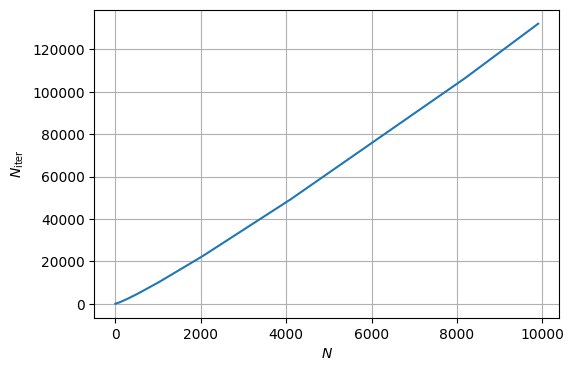

In [44]:
import matplotlib.pyplot as plt
n_values = np.arange(1, 10001, 100)
iterations = []

for n in n_values:
    arr = list(range(n, 0, -1))  # Reverse sorted array to ensure worst-case scenario
    _, ops_count = merge_sort(arr)
    iterations.append(ops_count)

plt.figure(figsize=(6, 4))
plt.plot(n_values, iterations)
plt.xlabel(r'$N$')
plt.ylabel(r'$N_\mathrm{iter}$')
plt.grid(True)
plt.show()

## Optimisation 🚀

*“Premature optimisation is the root of all evil”* - [Sir Tony Hoare](https://en.wikipedia.org/wiki/Tony_Hoare) (or [Donald Knuth](https://en.wikipedia.org/wiki/Donald_Knuth))

## When we (should) optimise

1. **Make it work**: Write the code in a simple, readable, and maintainable way. **Correct first, fast later!**
2. **Make it reliable**: Write tests so if we break the code optimising, we'll find out.
3. **Profile, profile, profile**: Measure the performance, **do not guess**!
4. **Convince yourself that the code is too slow**: Does it really hurt if it's "too" slow? Is my use case realistic?
5. **Consider the costs of optimisation**: Hardware is cheaper than the developer's time. How much will readability suffer?
$$...$$
...**Optimise**

In [11]:
import this

### Algorithmic optimisation

- Generally, it should be the first thing to look for: Is there a way to compute less?
    - Is there an algorithm with a different big O?
    - Can I rearrange my equation/formula to compute less? Good old pen and paper approach.
    - Is there a different data structure which is more appropriate?

### Select better data structure

In [13]:
import numpy as np

x = np.random.randint(0, 100, 1000)
y = np.random.randint(0, 100, 1000)

def find_common_loops(x, y):
    """Find common elements in arrays x and y."""
    res = []
    for i in x:
        for j in y:
            if i==j and i not in res:
                res.append(i)
    return res

%timeit -n 1 -r 1 find_common_loops(x, y)

156 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


If we use sets:

In [14]:
def find_common_sets(x, y):
    return list(set(x) & set(y))

%timeit find_common_sets(x, y)

203 μs ± 14.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Let third-party libraries do the work

#### Example: Aggregations

In [16]:
A = np.random.rand(100, 100)

def mean_loops(A):
    s = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            s += A[i, j]
    return s / A.size

def mean_numpy(A):
    return A.mean()  # or np.mean(A)

In [17]:
%timeit mean_loops(A)

2.86 ms ± 84.6 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit mean_numpy(A)

13.6 μs ± 387 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### Example: Matrix-matrix multiplication

In [19]:
A = np.random.rand(100, 100)
B = np.random.rand(100, 100)

def matmult_loops(A, B):
    res = np.zeros([A.shape[0], B.shape[1]])
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            for k in range(res.shape[1]):
                res[i, j] += A[i, k] * B[k, j]
    return res

def matmult_numpy(A, B):
    return A @ B  # np.matmult(A, B)

In [20]:
%timeit matmult_loops(A, B)

881 ms ± 79.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
%timeit matmult_numpy(A, B)

104 μs ± 8.37 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Why is NumPy so cool? 😎

- Written in C, a compiled language, allowing faster execution than pure Python.
- Python’s interpreted nature is slower; NumPy overcomes this by handling heavy computations outside Python’s interpreter.
- Provides high-level syntax with low-level performance.
- Array-Based Computing: Optimized for multi-dimensional data structures (arrays), crucial for scientific computing.
- Broad Ecosystem Compatibility: Foundational for libraries like SciPy, Pandas, TensorFlow.
- Python’s popularity in computational science owes much to NumPy’s ability to process data quickly and efficiently.

### Vectorization and SIMD in NumPy

**Vectorization**
- Eliminates the need for explicit loops in Python.
- Operations apply on entire arrays, rather than element-by-element.
- Allows faster execution by taking advantage of compiled code optimizations.

**SIMD (Single Instruction, Multiple Data)**
- Enables parallel processing at the CPU level.
- Executes a single instruction on multiple data points simultaneously.
- Reduces processing time significantly for operations on large arrays.

Takehome message: **Use NumPy to leverage C's speed, vectorized operations, and SIMD.**

### Memoisation (caching) - do not compute the same thing twice.

#### Example: Fibonacci

In [23]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

%timeit fibonacci(25)

28.7 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


75025

We can use `cache` to save the results of previous calls.

In [24]:
import functools

@functools.cache
def fibonacci(n):
    if n == 0:  # There is no 0'th number
        return 0
    elif n == 1:  # We define the first number as 1
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

%timeit fibonacci(25)

107 ns ± 3.59 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Exercise 3: Caching

In one of the previous exercises, we wrote a function for computing factorial using recursion. Measure how much the performance improves if caching is used. Measure performance for `n=100`.

#### Solution

In [25]:
import functools

def factorial_no_cache(n):
    if n == 0:
        return 1
    else:
        return n * factorial_no_cache(n-1)
    
    
@functools.cache
def factorial_cache(n):
    if n == 0:
        return 1
    else:
        return n * factorial_cache(n-1)

In [26]:
%timeit factorial_no_cache(100)

15.6 μs ± 829 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [27]:
%timeit factorial_cache(100)

100 ns ± 1.41 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


### Exercise 4: Code optimisation

Below is the code for estimating $\pi$ that we used previously to practice profiling.

1. Run the following cell, which measures the wall time for `estimate_pi(1_000_000).`
2. Using profiling and optimisation, optimise the code. Make it as fast as you can.How much were you able to reduce the wall time?

In [38]:
import random
import time
import functools

def random_list(size):
    """
    Generate a list of random numbers between 0 and 1.
    
    Parameters
    ----------
    size : int
        The number of random numbers to generate.
    
    Returns
    -------
    list of float
        A list of random numbers between 0 and 1.
    """
    #return [random.random() for _ in range(size)]
    return np.random.random(size)

def distance(x, y):
    """
    Compute the distance of a point (x, y) from the origin (0, 0).
    
    Parameters
    ----------
    x : float
        The x-coordinate of the point.
    y : float
        The y-coordinate of the point.
    
    Returns
    -------
    float
        The distance from the origin.
    """
    return (x**2 + y**2)**0.5

@functools.cache
def estimate_pi(n):
    """Estimate the value of pi using Monte Carlo simulation.
    
    Parameters
    ----------
    n : int
        The number of random points generated.
        
    Returns
    -------
    float
        An estimate of pi.

    """
    x_list = random_list(n)
    y_list = random_list(n)
    
    #in_circle = 0
    #for x, y in zip(x_list, y_list):
    #    if distance(x, y) <= 1:
    #        in_circle += 1
    dist_array = distance(x_list, y_list)
    dist_array[dist_array<=1] = True
    dist_array[dist_array != True] = False
    in_circle = dist_array.sum()
            
    return 4*in_circle / n

%timeit estimate_pi(n=1_000_000)

#%prun estimate_pi(n=1_000_000)
#%lprun -f estimate_pi estimate_pi(1_000_000)
#estimate_pi(1_000_000) # this is to check for sensible result, location of @functools.cache matters

# original : 1.84 s ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# now without cache : 155 ms ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
# now with cache but with wrong result because i put @functools.cache wrongly : 48 ms ± 6.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# now with cache and right result : 380 ns ± 105 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
# this is 4842105 times faster!


425 ns ± 64.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


#### Solution

This is an open ended problem. There are a lot of possible solutions. The solution I am giving you is just one of them.

(If you managed to speed up your code more than 10 times, you did a great job!)

In [39]:
import numpy as np

def estimate_pi(n):
    """Estimate the value of pi using Monte Carlo simulation.
    
    Parameters
    ----------
    n : int
        The number of random points generated.
        
    Returns
    -------
    float
        An estimate of pi.

    """
    x = 2*np.random.rand(n) - 1
    y = 2*np.random.rand(n) - 1
    return 4 * (np.sqrt(x*x + y*y) < 1).sum() / n

%timeit estimate_pi(n=1_000_000)

78.9 ms ± 8.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### My code is still slow. What now?

* Replace as much of your code with third-party libraries - they are likely better optimised than what you had time for. 
* Are you using all the cores in your system? Following step 1 above first will likely mean this is true. If you still see only one core being used, you need to parallelise your program. Tomorrow's lecture will introduce that. 
* You could transfer the hot spots, i.e. the few lines or functions in which most of the time is spent, to compiled code ([numba](https://numba.pydata.org) or [Cython](https://cython.org/)).

### Feedback form

I’d love to hear your thoughts on today’s lecture — your feedback helps me make future sessions better for you!

https://forms.office.com/e/BiekMgPTMm